# 0.1 Google File Stream

In order to access the google drive files via VScode you need to install the google drive app on your computer. This will create a directory where all of your google drive files are stored on your computer. Any files in this directory will be automatically uploaded/updated in the google drive. To access the files in this path you need to define your own path. 

My path is shown below. Comment out my path and add your own. Whenever you run this notebook make sure that your path is the one that has been run here. 

Then to access any files in the drive within the code you can do something like: `"{}03-LSD-calculations/LSD/hybrid_maskdepth0.02_tellClean/".format(path)`

In [1]:
path='G:/Shared drives/BeStarsMiMeS/UpdatedFiles/' #Patrick's google file stream path

#path = 'G:/Shared drives/BeStarsMiMeS/UpdatedFiles/' #Marisol's google file stream path

# 0.2 PYTHONPATH

For Mac:
* Ask Vero how to set up a pythonpath

For windows: 
* Create a directory where you will store your unreleased python packages (specpolFlow and LSDpy). 

* In PowerShell type `setx.exe PYTHONPATH "C:\Users\pjsta\MyPythonPrograms"` Where the thing in the "" is the path of the directory you created. 
    
* Then git clone specpolflow and LSDpy into that directory and close and reopen VScode.

# 0.3 Importing Packages

In [2]:
import LSDpy.lsdpy
import specpolFlow as pol


import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import itertools

loading specpolFlow package


In [3]:
#Accessing the google sheets

sheet_id = '1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk'
sheet_name = 'Stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

sheet_name = 'Observations'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Observations=pd.read_csv(url)

In [4]:
StarData

HD       Name  Nobs        T  log(g)  ModelCode  Adopted-vsini  \
0     6226.0     hd6226   1.0  15000.0     4.0  T15000g40         120.00   
1     7636.0     hd7636   2.0  15000.0     4.0  T15000g40         220.00   
2    10144.0    hd10144   1.0  20000.0     3.5  T20000g35         245.31   
3    10516.0    hd10516   1.0  25000.0     4.0  T25000g40         382.04   
4    11415.0    hd11415   1.0  18000.0     4.0  T18000g40          48.00   
..       ...        ...   ...      ...     ...        ...            ...   
74  221507.0   hd221507   1.0  10500.0     4.0  T10500g40          40.00   
75  224686.0   hd224686   2.0  13000.0     4.0  T13000g40         286.16   
76  239712.0   hd239712   1.0  21000.0     4.0  T21000g40         304.86   
77       NaN  bd-134933   1.0  30000.0     4.0  T30000g40         239.56   
78       NaN        NaN   NaN      NaN     NaN        NaN            NaN   

        Halpha shape                                              Notes  \
0         absorption  no disk during observation, rotational modulat...   
1   asymetric single                        binary? no tess observation   
2               bowl                                 binary or pulsator   
3   asymetric double  sdO companion https://iopscience.iop.org/artic...   
4         absorption  not a binary https://iopscience.iop.org/articl...   
..               ...                                                ...   
74        absorption                                      Not a Be star   
75             shell                                                NaN   
76  asymetric double                                                NaN   
77            single                                                NaN   
78               NaN                                                NaN   

    BadvsiniFlag  ...  pyRavenFlag  AsifgoodFlag TweakgoodFlag  Unnamed: 18  \
0            1.0  ...          NaN           NaN           NaN          NaN   
1            NaN  ...          NaN           NaN           NaN          NaN   
2            NaN  ...          1.0           1.0           1.0          NaN   
3            1.0  ...          1.0           1.0           1.0          NaN   
4            1.0  ...          NaN           NaN           NaN          NaN   
..           ...  ...          ...           ...           ...          ...   
74           1.0  ...          NaN           NaN           NaN          NaN   
75           1.0  ...          1.0           1.0           NaN          NaN   
76           NaN  ...          1.0           1.0           NaN          NaN   
77           1.0  ...          NaN           NaN           NaN          NaN   
78           NaN  ...         39.0          51.0          41.0          NaN   

   Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  Unnamed: 23  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   
..         ...          ...          ...          ...          ...   
74         NaN          NaN          NaN          NaN          NaN   
75         NaN          NaN          NaN          NaN          NaN   
76         NaN          NaN          NaN          NaN          NaN   
77         NaN          NaN          NaN          NaN          NaN   
78         NaN          NaN          NaN          NaN          NaN   

    Unnamed: 24  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
..          ...  
74          NaN  
75          NaN  
76          NaN  
77          NaN  
78          NaN  

[79 rows x 25 columns]

In [5]:
Observations

1  Unnamed: 1  Unnamed: 2       Name        LSDfileName     NameAsif  \
0    185         1.0           1     hd6226     hd6226_1.lsd.s     hd6226_1   
1    193         2.0           1     hd7636     hd7636_1.lsd.s     hd7636_1   
2    194         2.0           2     hd7636     hd7636_2.lsd.s     hd7636_2   
3      2         3.0           1    hd10144    hd10144_1.lsd.s    hd10144_1   
4      3         4.0           1    hd10516    hd10516_1.lsd.s    hd10516_1   
..   ...         ...         ...        ...                ...          ...   
196  137        74.0           1   hd221507   hd221507_1.lsd.s   hd221507_1   
197  140        75.0           1   hd224686   hd224686_1.lsd.s   hd224686_1   
198  141        75.0           2   hd224686   hd224686_2.lsd.s   hd224686_2   
199  145        76.0           1   hd239712   hd239712_1.lsd.s   hd239712_1   
200    1        77.0           1  bd-134933  bd-134933_1.lsd.s  bd-134933_1   

                          NameOfMask  Unnamed: 7  \
0    mask_T15000g40lamb3700_9000.dat           0   
1    mask_T15000g40lamb3700_9000.dat           0   
2    mask_T15000g40lamb3700_9000.dat           0   
3    mask_T20000g35lamb3700_9000.dat           1   
4    mask_T25000g40lamb3700_9000.dat           0   
..                               ...         ...   
196  mask_T10500g40lamb3700_9000.dat           1   
197  mask_T13000g40lamb3700_9000.dat           1   
198  mask_T13000g40lamb3700_9000.dat           1   
199  mask_T21000g40lamb3700_9000.dat           0   
200  mask_T30000g40lamb3700_9000.dat           0   

                     NameOfSymbolicLinkToData  Unnamed: 9  Unnamed: 10  \
0                  hd6226_11AP14_1310132pnv.s      110.34   -60.297909   
1                  hd7636_11AP14_1314767pnv.s      230.00     0.000000   
2                  hd7636_11AP14_1316457pnv.s      230.00     0.000000   
3     hd10144_187.D-0917A_2011-12-11_01_pnv.s      245.31    12.981952   
4                 hd10516_11AP14_1311181pnv.s      382.04   -60.990786   
..                                        ...         ...          ...   
196  hd221507_187.D-0917A_2012-07-19_01_pnv.s       20.00     0.000072   
197  hd224686_187.D-0917A_2011-12-09_01_pnv.s      286.16    11.694301   
198  hd224686_187.D-0917A_2011-12-12_01_pnv.s      286.16     8.724928   
199              hd239712_11BP14_1331344pnv.s      304.86    -0.002959   
200              bd-134933_06BF15_861711pnv.s      239.56    -0.001092   

     Unnamed: 11  
0     -70.000000  
1       0.000000  
2       0.000000  
3      12.981952  
4     -60.990786  
..           ...  
196     0.000072  
197    11.694301  
198     8.724928  
199    -0.002959  
200    -0.001092  

[201 rows x 12 columns]

# 1. Demo for single star

The next major step in the Be star project is to run all the stars through pyRaven to calculate the maximum value of Bpole. This take a VERY long time to do, and we don't want to do it for all eight mask models. The plots being made here will allow us to decide which models which don't need to be run through pyRaven. 

We are already excluding the line depth 0.1 models. So the models we want to compare are the following:
* hybrid_maskdepth0.02_tellClean
* hybrid_CleanAsif+tellClean
* hybrid_CleanAsifTweak+tellClean
* normalized_CleanAsif+tellClean
* normalized_CleanAsifTweak+tellClean

An example of the plots we would like for a single star are given below. 

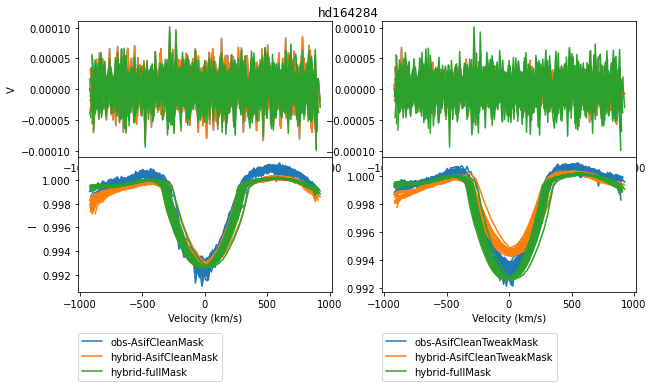

In [6]:
models1=['normalized_CleanAsif+tellClean',
         'hybrid_CleanAsif+tellClean',
         'hybrid_maskdepth0.02_tellClean']

models2=['normalized_CleanAsifTweak+tellClean',
 'hybrid_CleanAsifTweak+tellClean',
 'hybrid_maskdepth0.02_tellClean']

labels1=['obs-AsifCleanMask','hybrid-AsifCleanMask','hybrid-fullMask']
labels2=['obs-AsifCleanTweakMask','hybrid-AsifCleanTweakMask','hybrid-fullMask']

star=StarData['Name'][49]#12
obs=Observations.loc[Observations["Name"]==star]

fig, ax = plt.subplots(2,2, figsize=(10,5))
for j in range(len(models1)): #Loop over the models
    for i in range(obs['Name'].size): #Loop over the observations

        #Left Plots
        file = '{}03-LSD-calculations/LSD/{}/{}_{}.lsd'.format(path,models1[j],star,i+1)
        lsd = pol.iolsd.read_lsd(file)
        lsd_size = lsd.vel.size
        vrad=obs['Unnamed: 11'][obs.index[i]]
        if i ==0:
            ax[1,0].plot(lsd.vel+vrad, lsd.specI, ms=3,label=labels1[j],color='C{}'.format(j))
        else:
            ax[1,0].plot(lsd.vel+vrad, lsd.specI, ms=3,color='C{}'.format(j))
        ax[0,0].plot(lsd.vel+vrad, lsd.specV, ms=3,color='C{}'.format(j))
        plt.subplots_adjust(hspace=.0)
        ax[1,0].set_xlabel('Velocity (km/s)')
        ax[1,0].set_ylabel('I')
        ax[0,0].set_ylabel('V')

        #Right Plots
        file2 = '{}03-LSD-calculations/LSD/{}/{}_{}.lsd'.format(path,models2[j],star,i+1)
        lsd2 = pol.iolsd.read_lsd(file2)
        lsd_size2 = lsd2.vel.size
        if i==0:
            ax[1,1].plot(lsd2.vel+vrad, lsd2.specI, ms=3,label=labels2[j],color='C{}'.format(j))
        else:
            ax[1,1].plot(lsd2.vel+vrad, lsd2.specI, ms=3,color='C{}'.format(j))
        ax[0,1].plot(lsd2.vel+vrad, lsd2.specV, ms=3,color='C{}'.format(j))

        plt.subplots_adjust(hspace=.0)
        ax[1,1].set_xlabel('Velocity (km/s)')

fig.suptitle(star,y=0.92)
ax[1,0].legend(loc=(0,-0.65))
ax[1,1].legend(loc=(0,-0.65))

# 2. Loop over all Stars

What we would like is for you make a loop that would make the above plot for each star and save the plots as a pdf.

Ideally what we want to see is no clear differences between the profiles. In that case, as with the left two demo plot, we only need to run one of the three models through pyRaven, saving a lot of time.


C:\Users\pjsta\AppData\Local\Temp/ipykernel_22552/2695289147.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(2,2, figsize=(10, 5))
No handles with labels found to put in legend.


ValueError: min() arg is an empty sequence

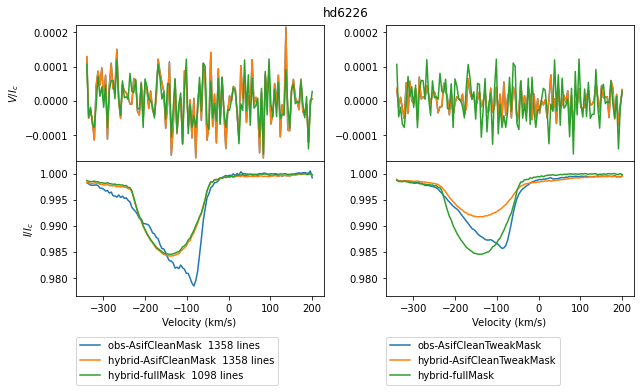

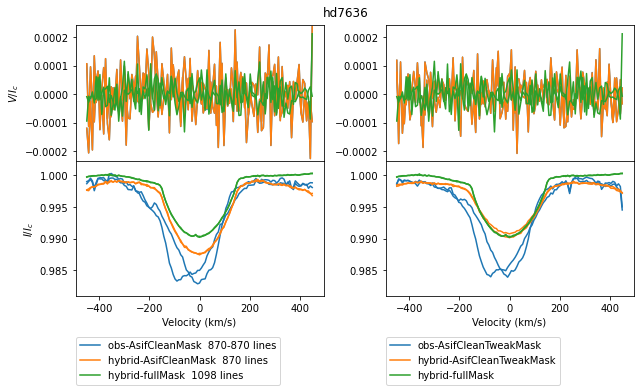

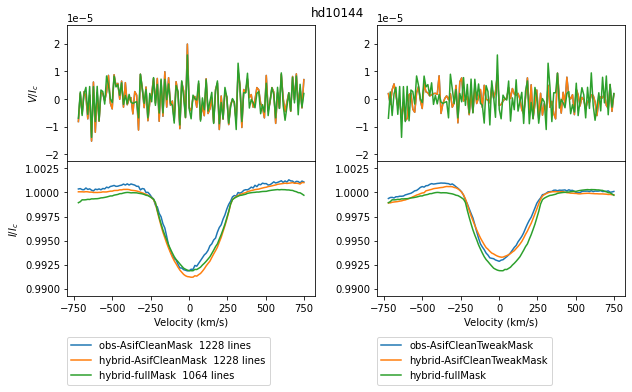

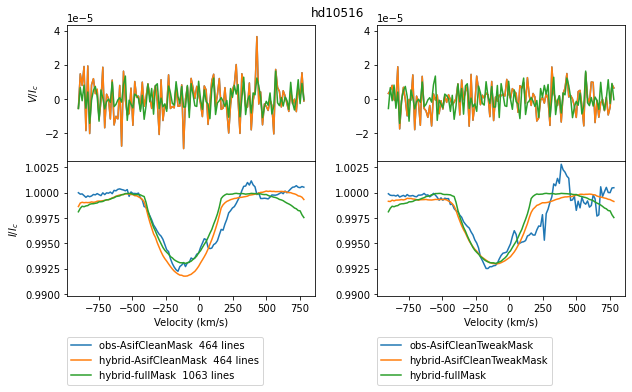

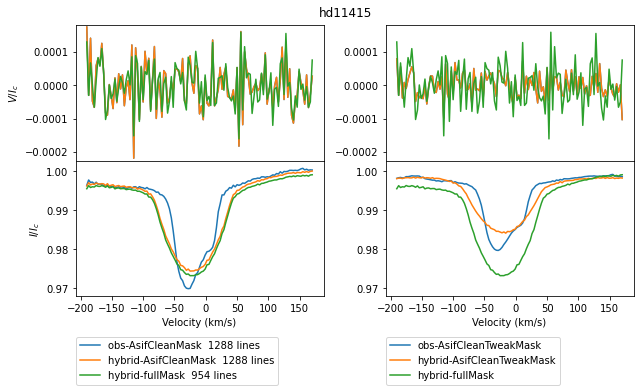

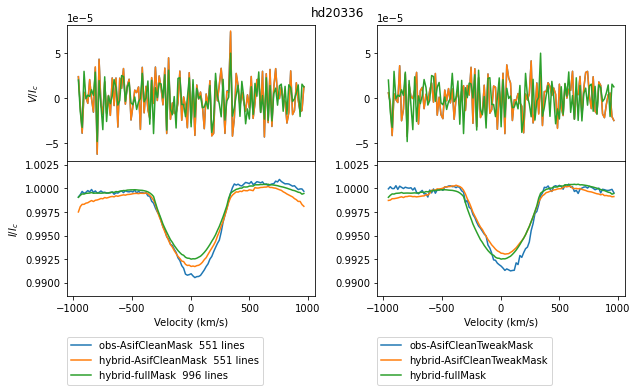

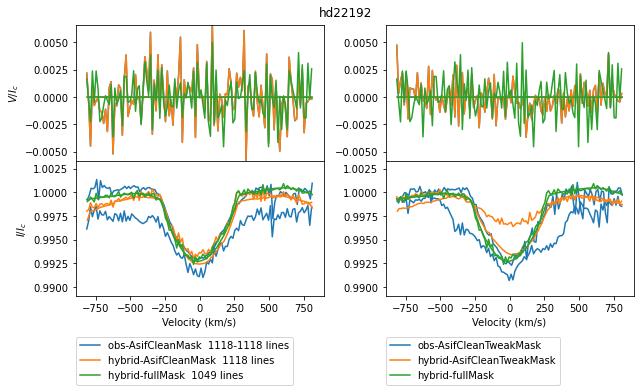

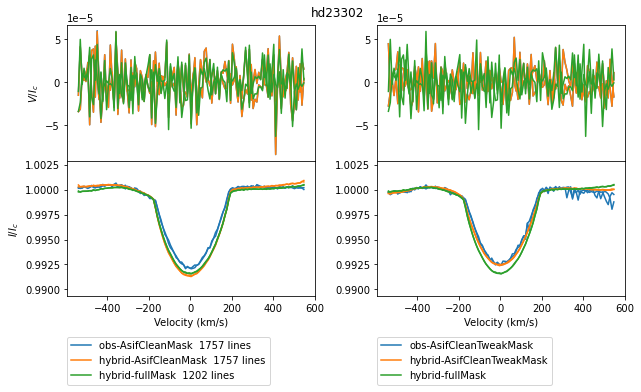

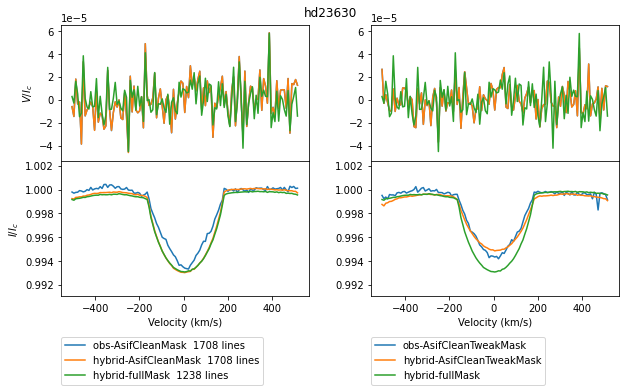

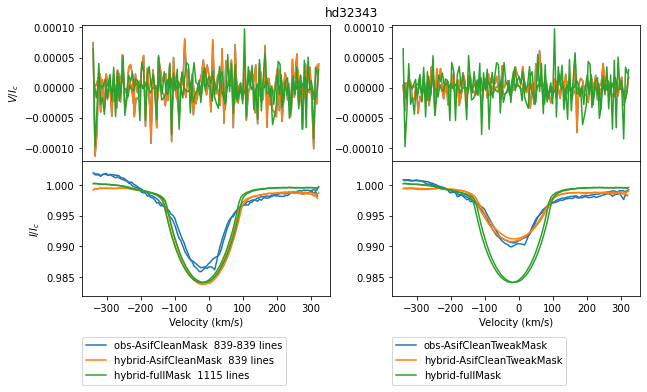

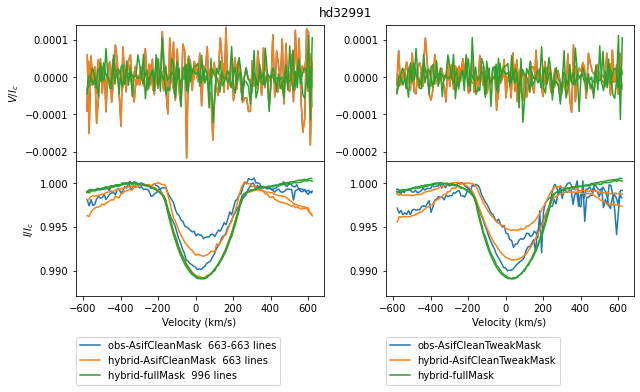

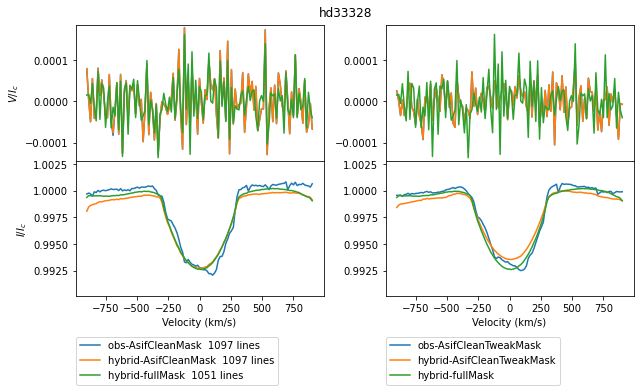

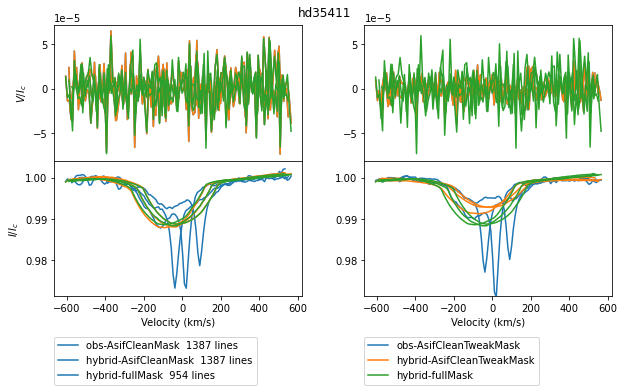

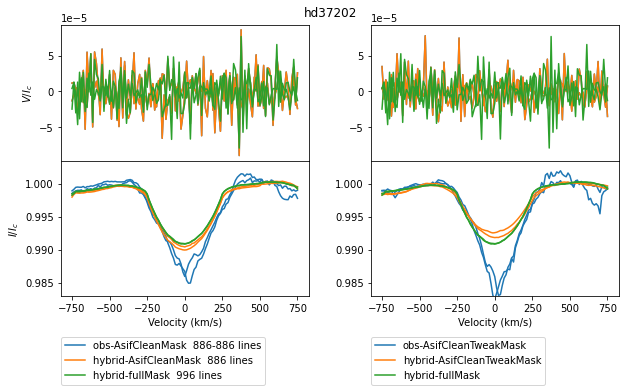

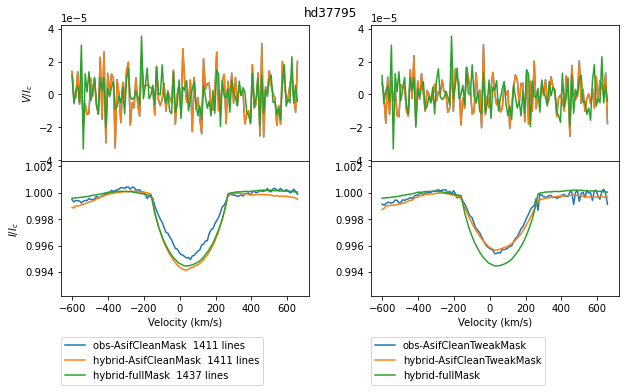

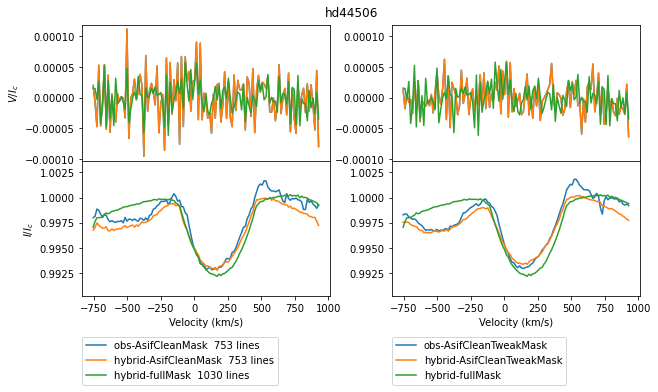

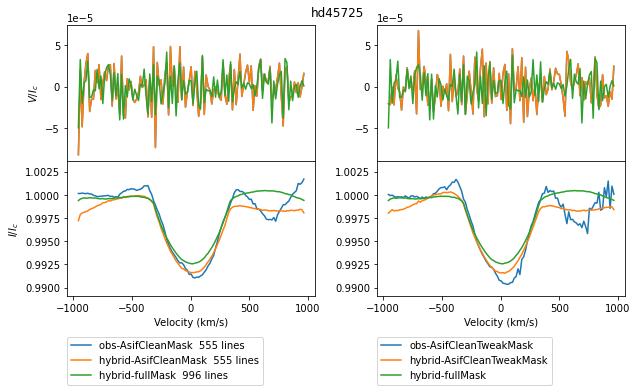

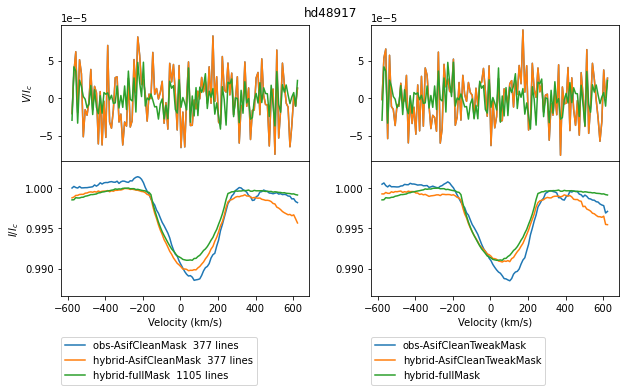

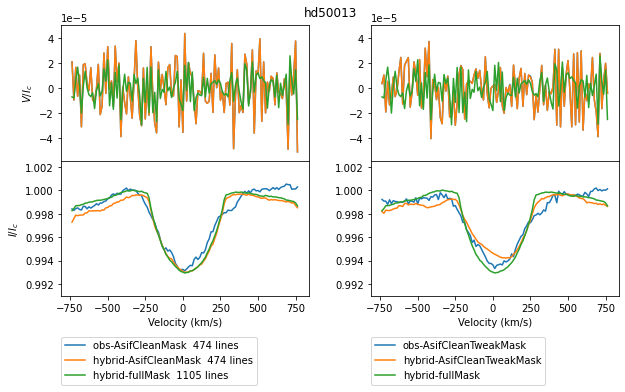

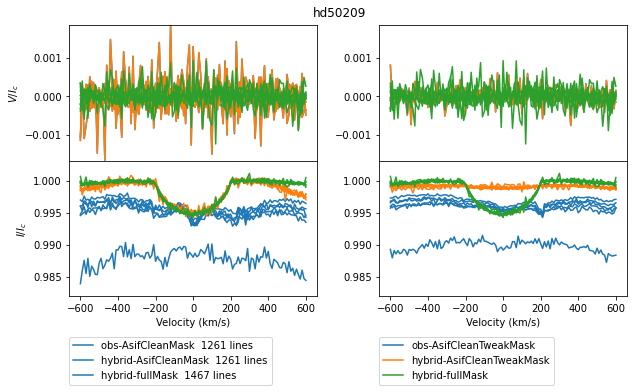

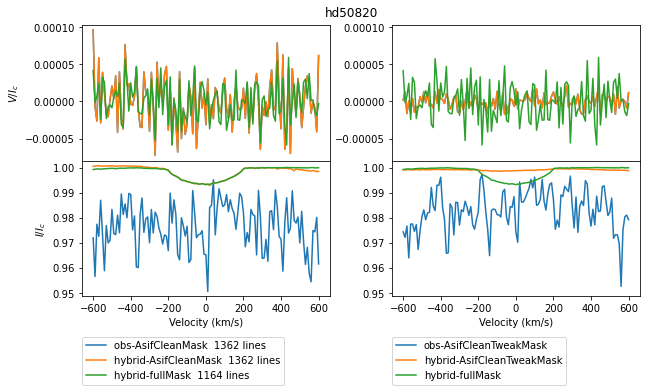

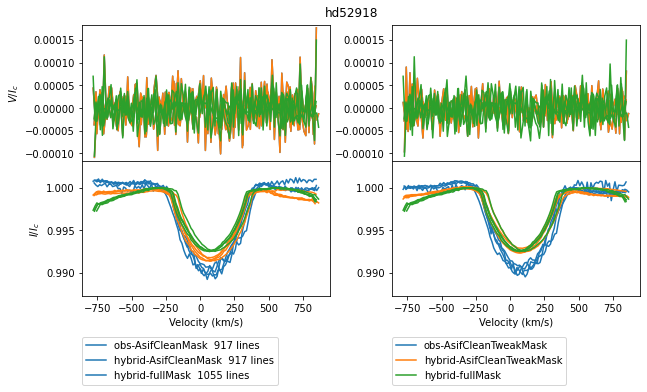

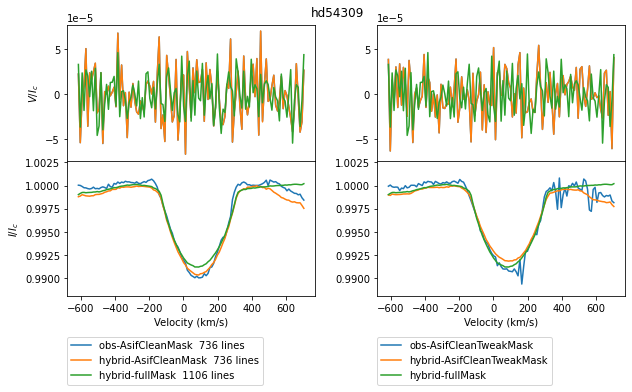

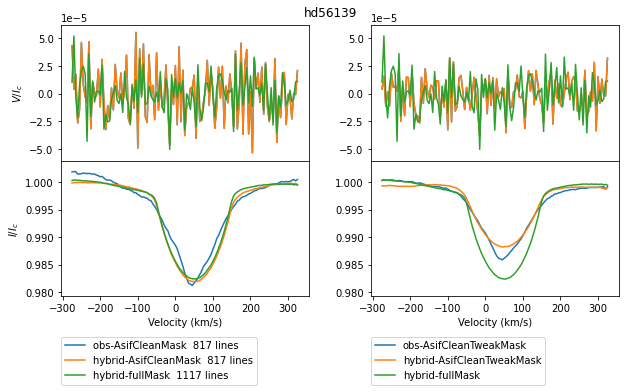

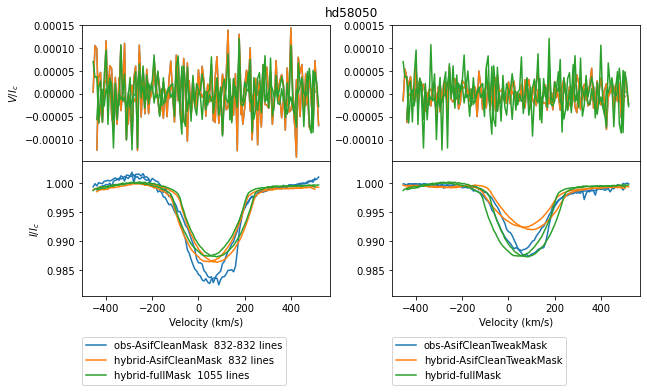

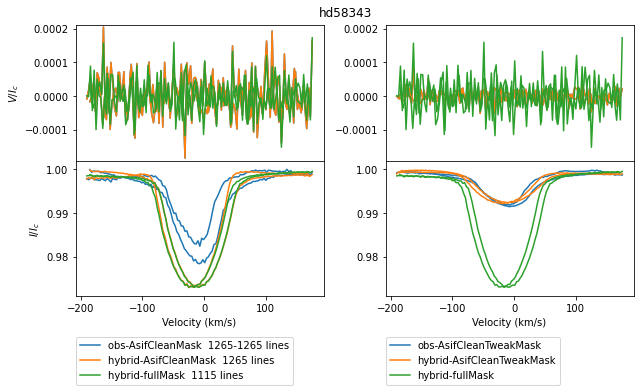

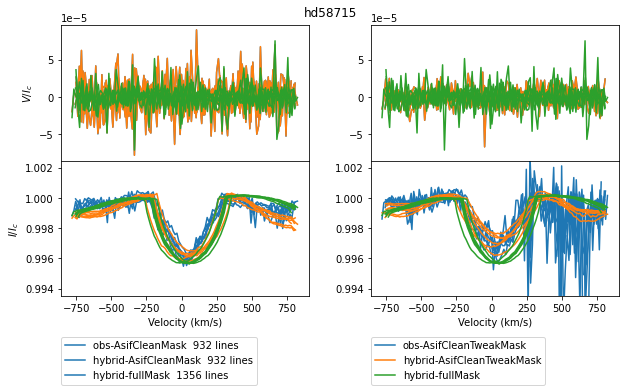

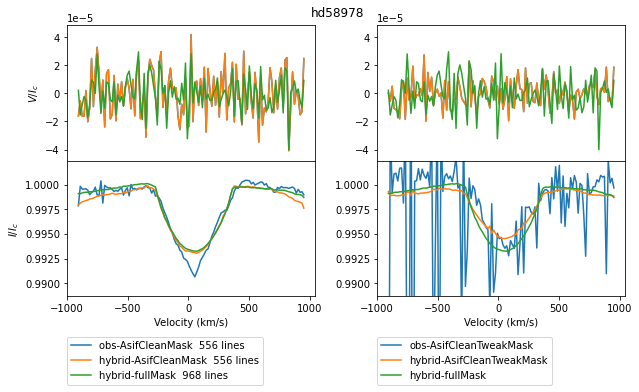

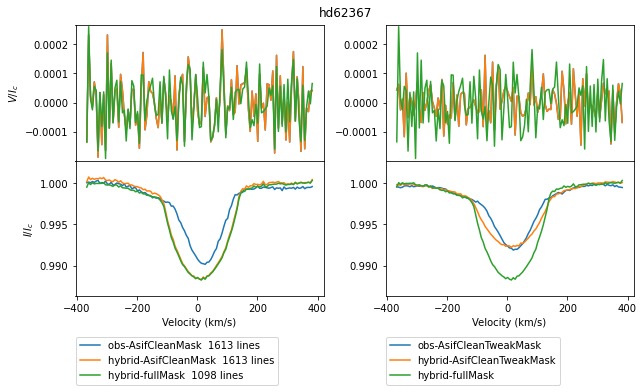

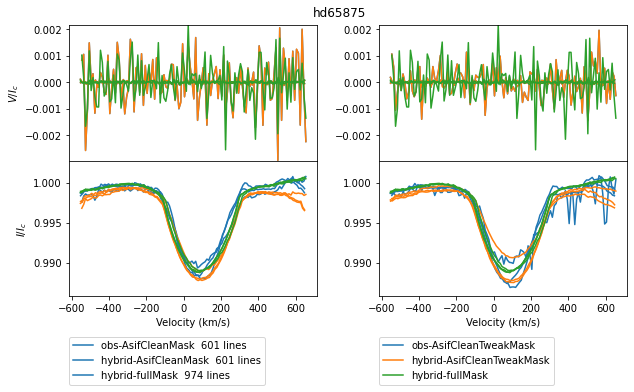

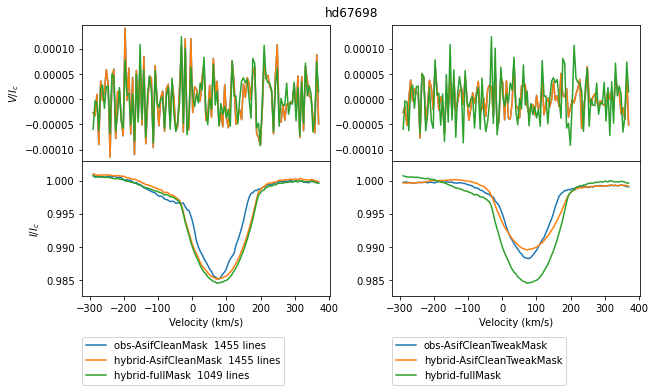

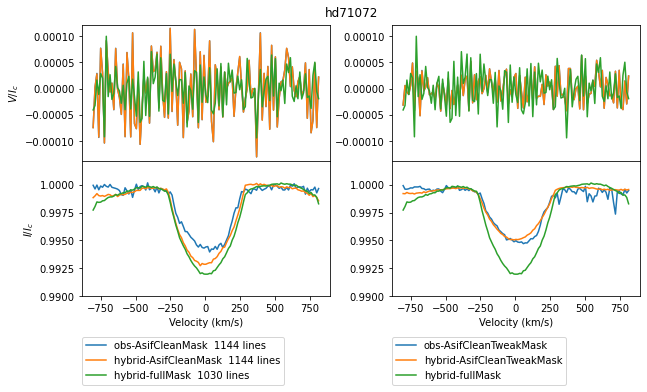

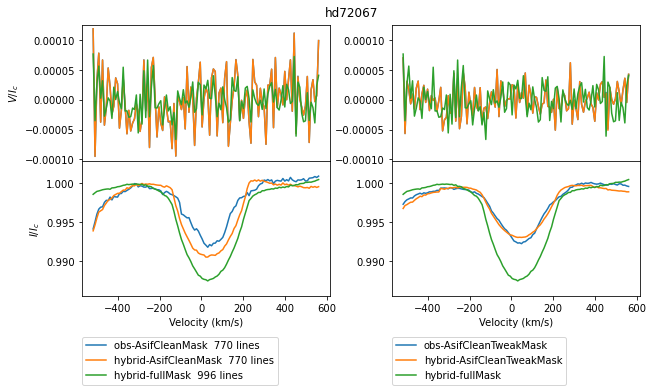

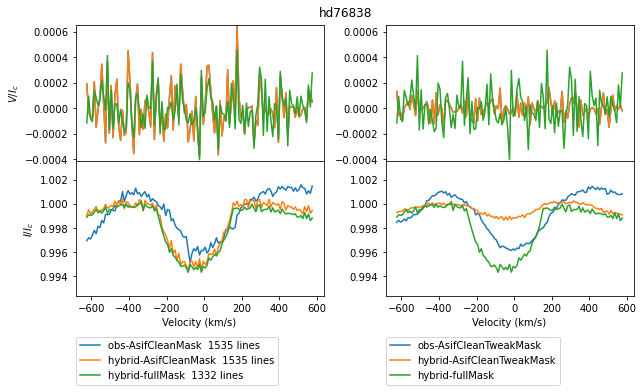

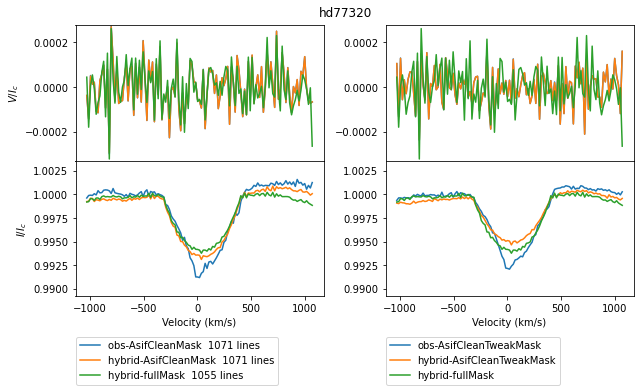

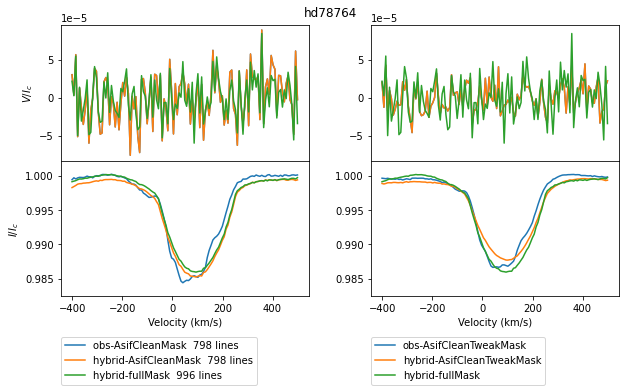

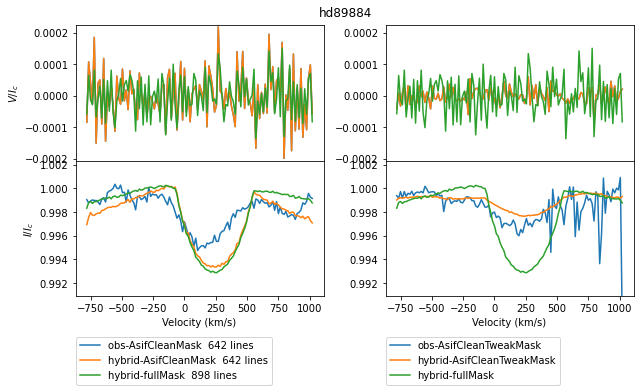

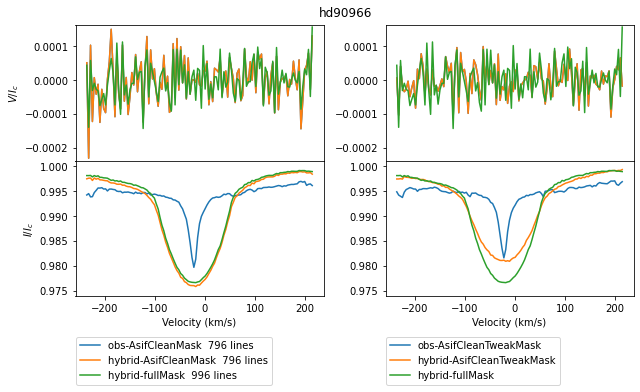

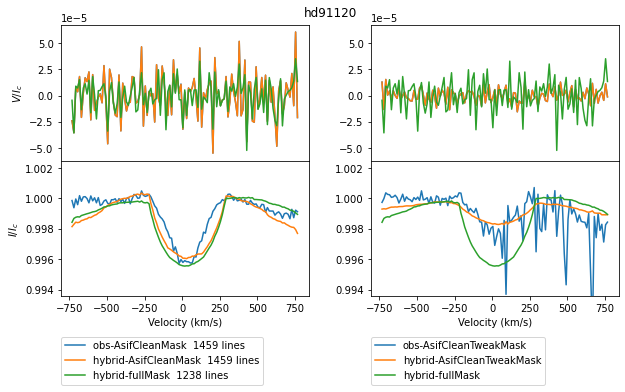

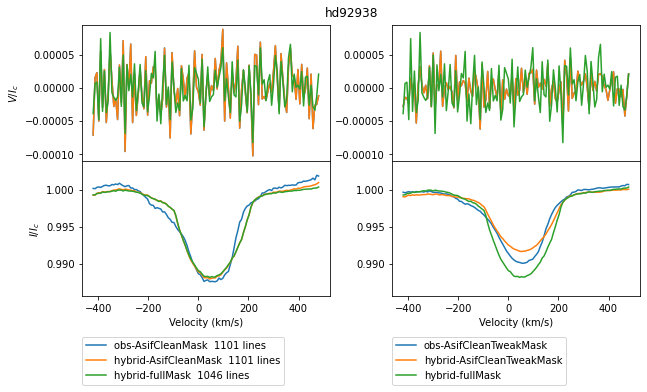

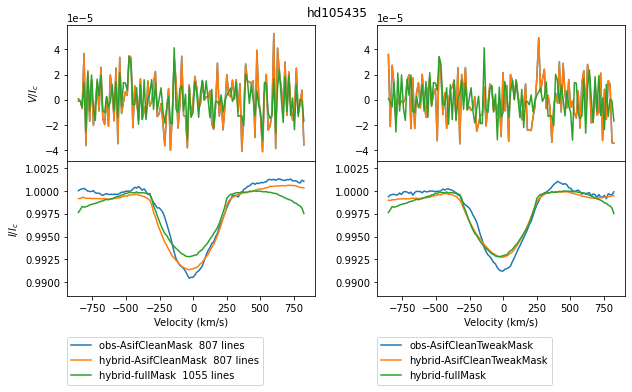

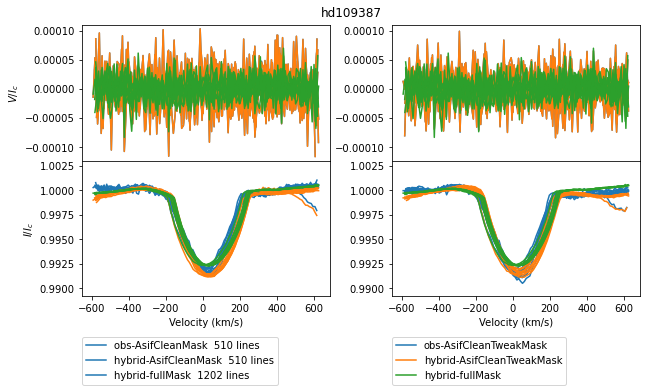

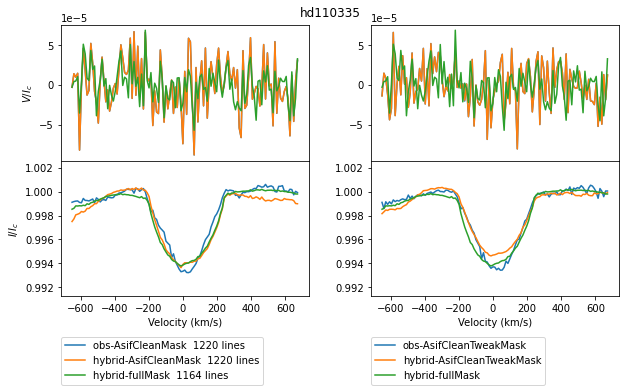

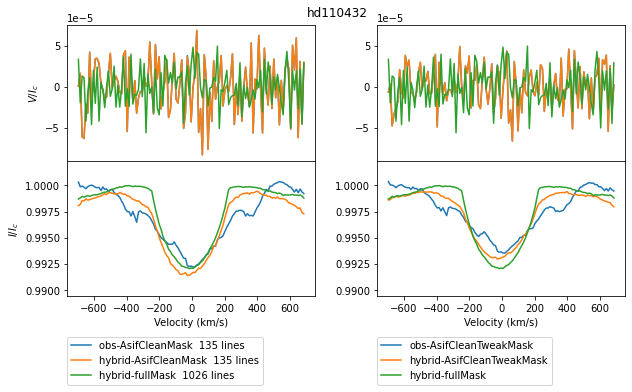

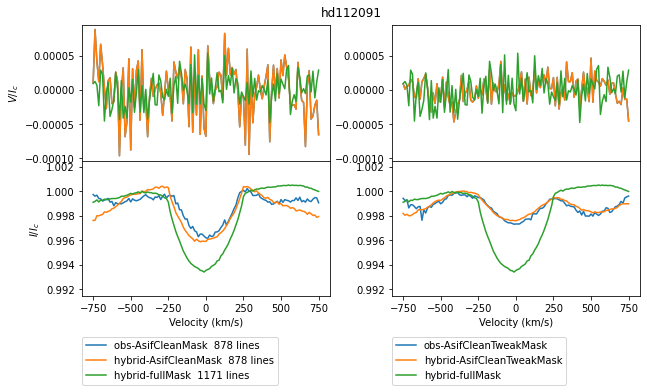

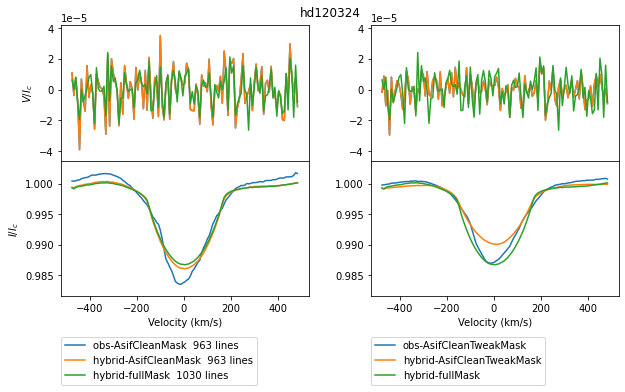

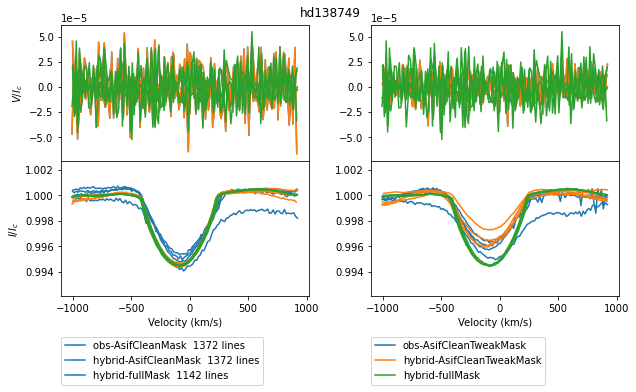

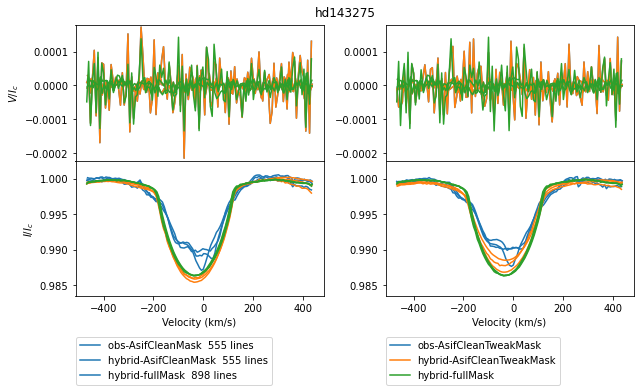

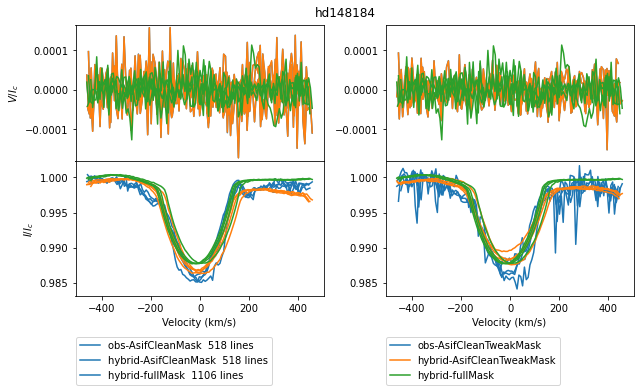

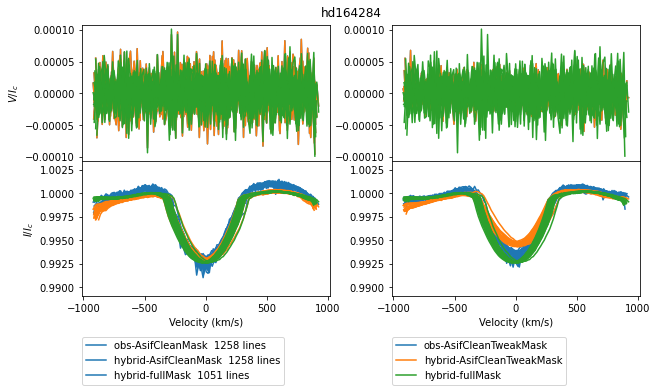

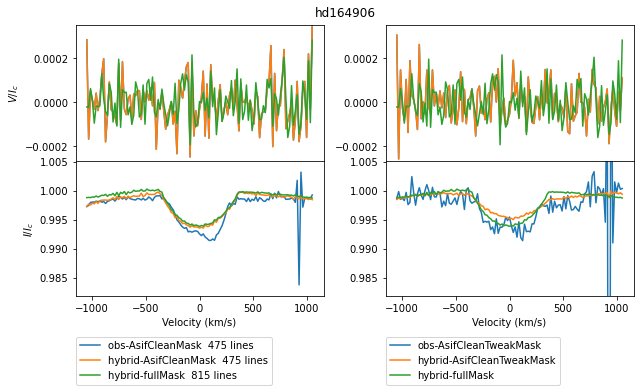

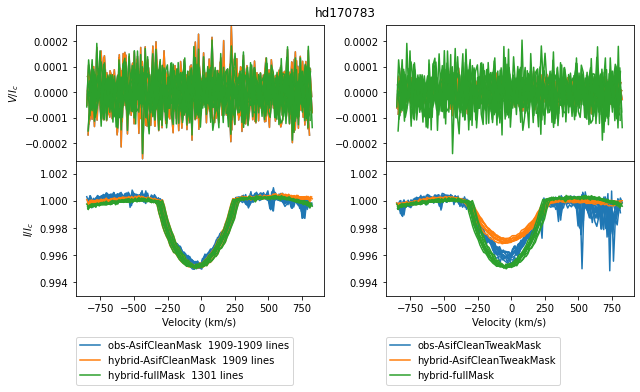

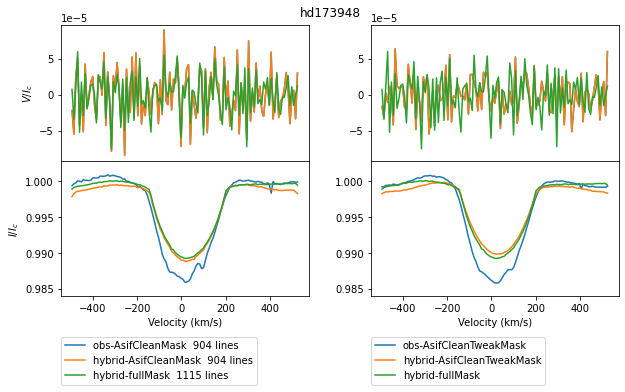

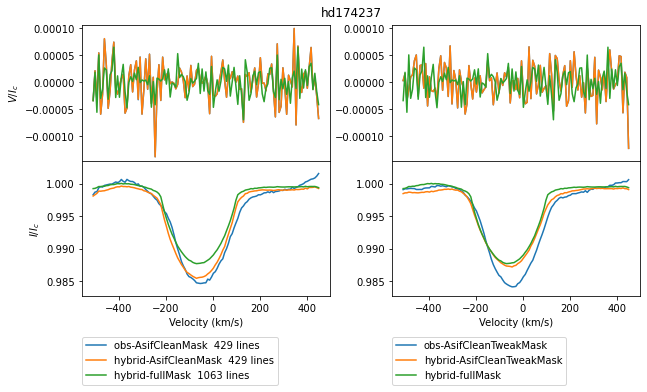

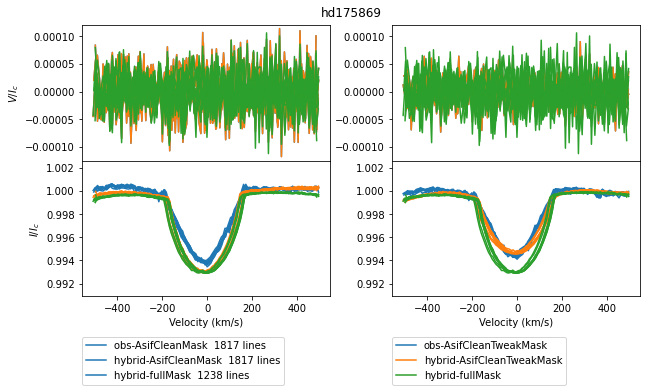

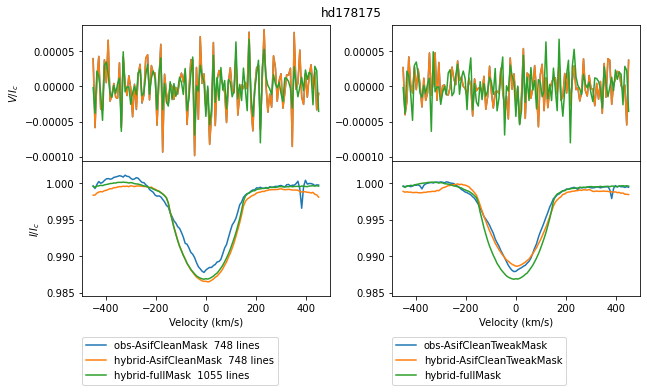

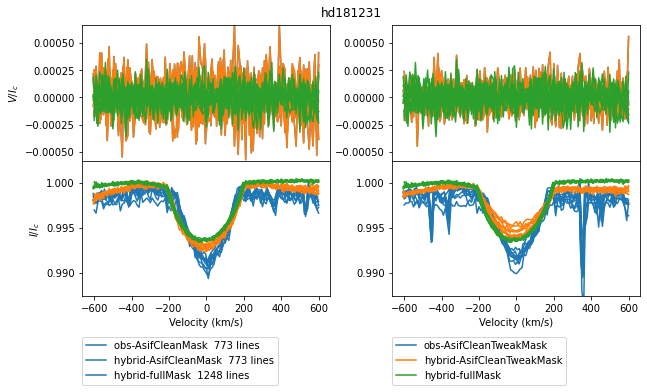

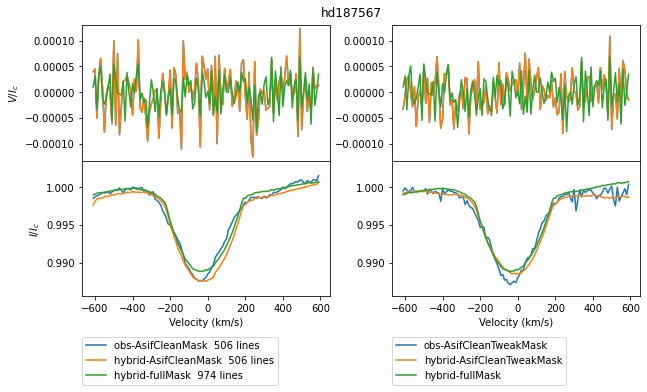

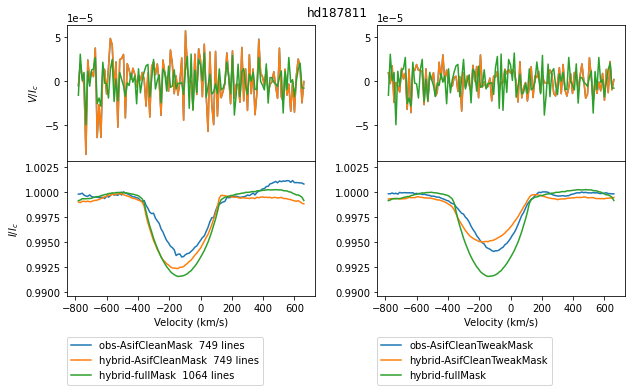

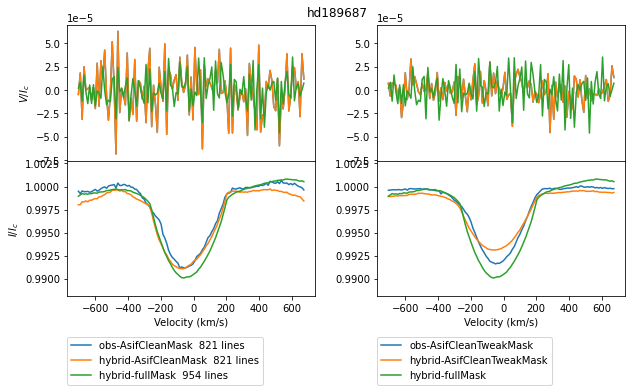

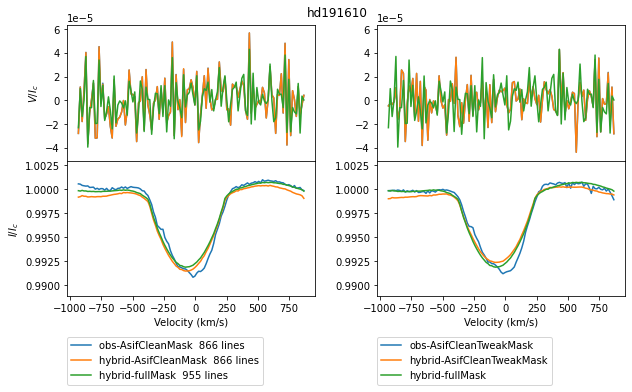

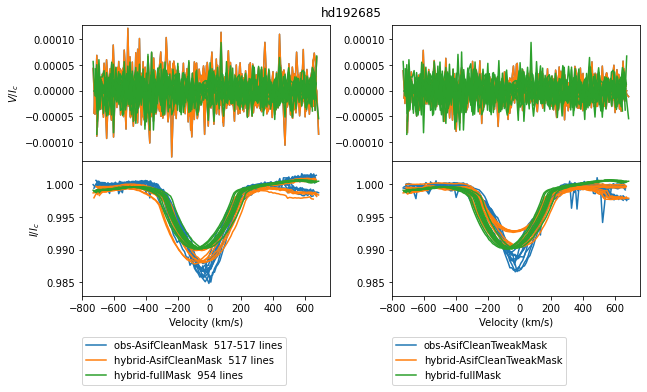

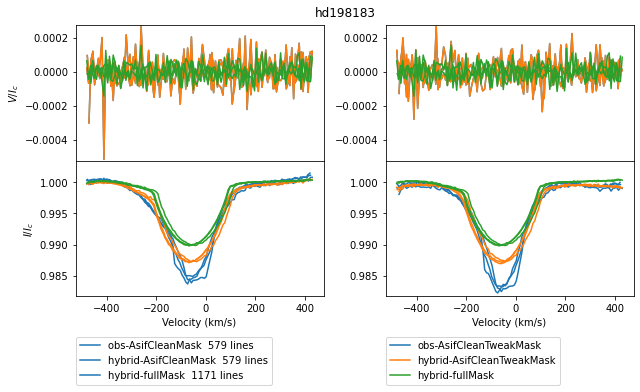

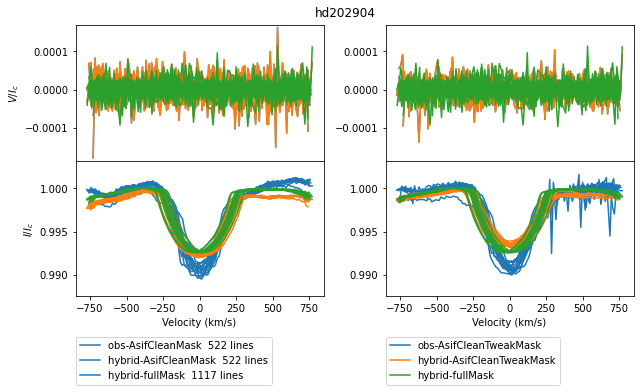

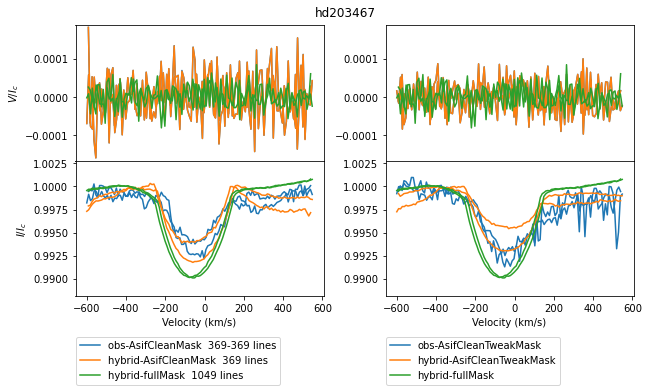

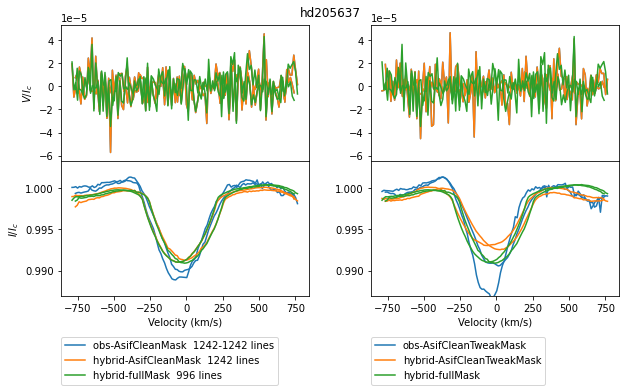

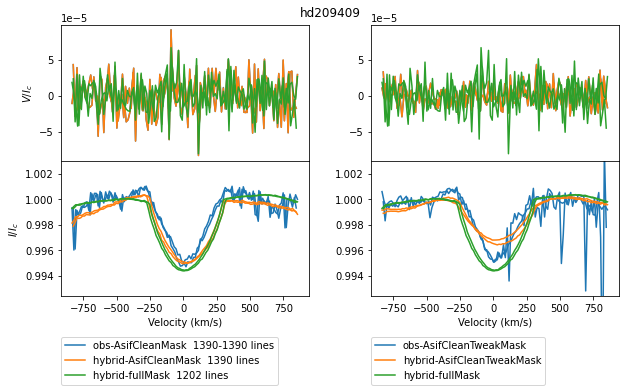

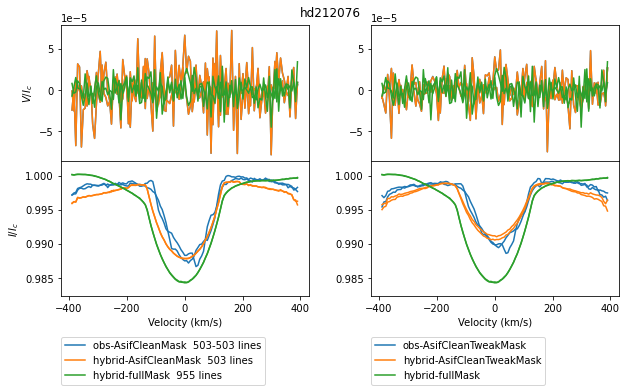

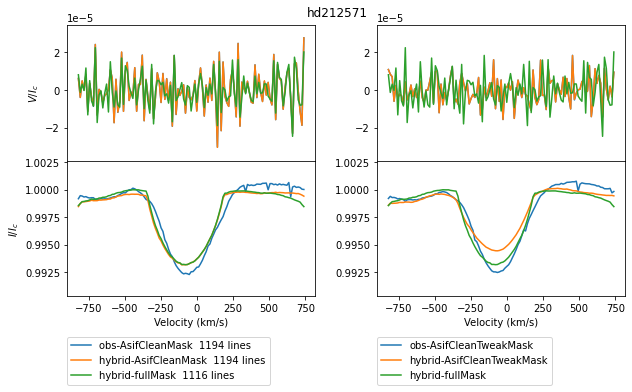

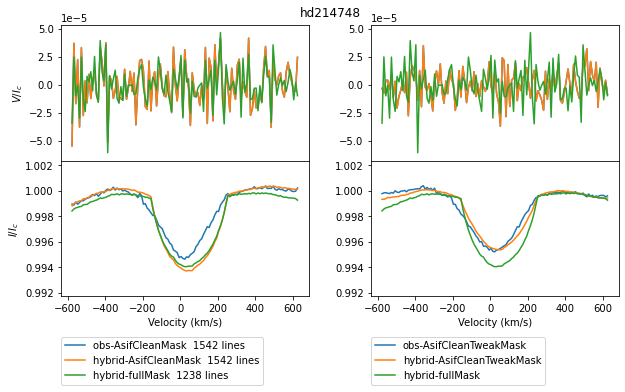

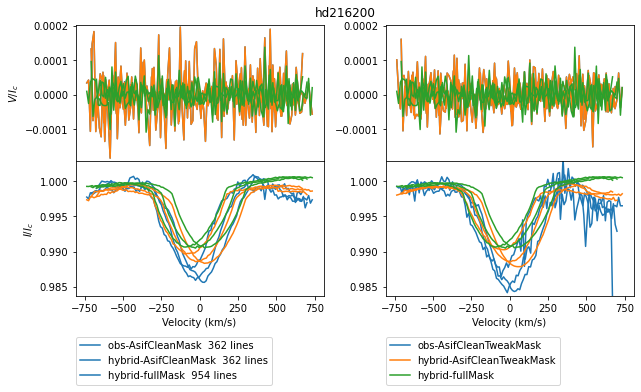

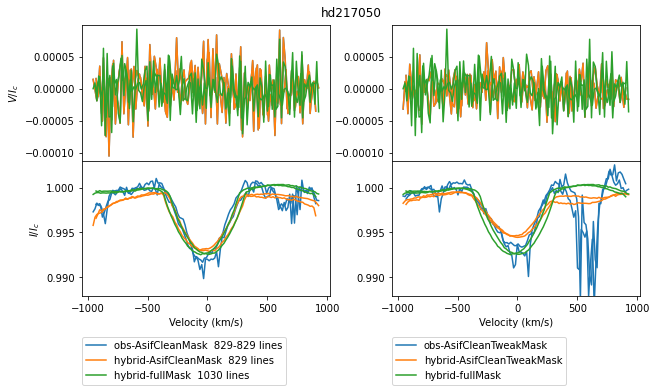

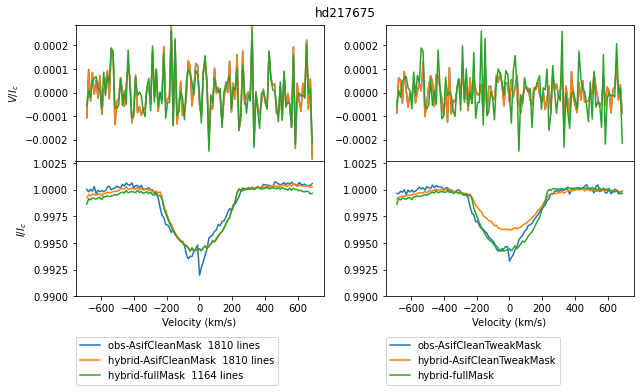

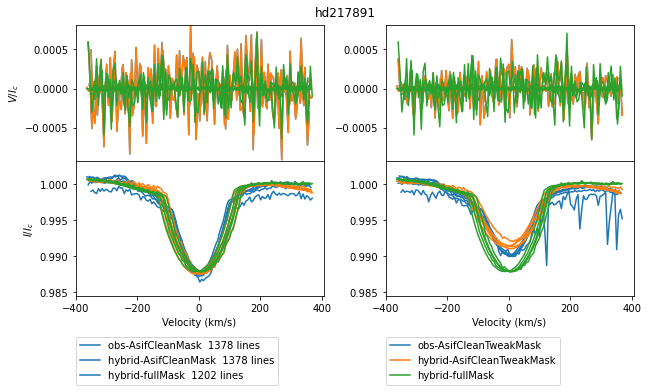

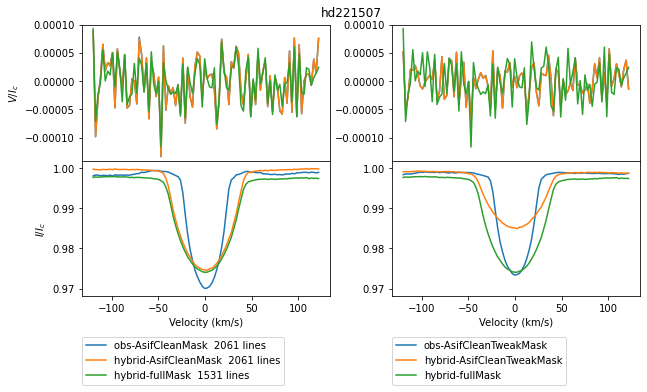

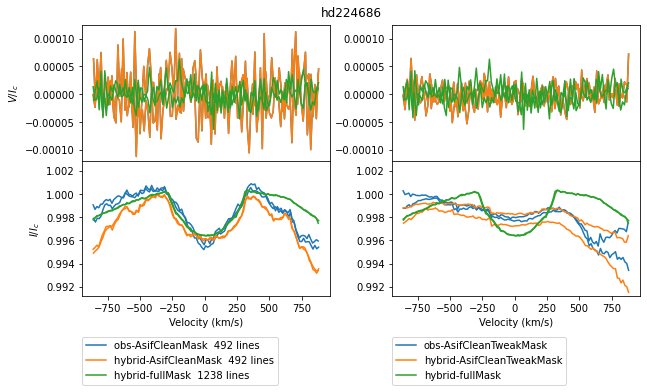

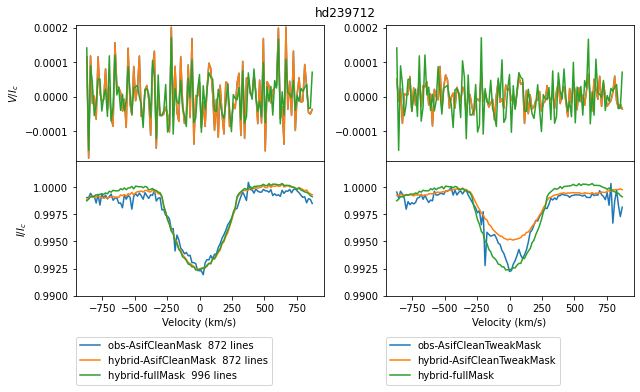

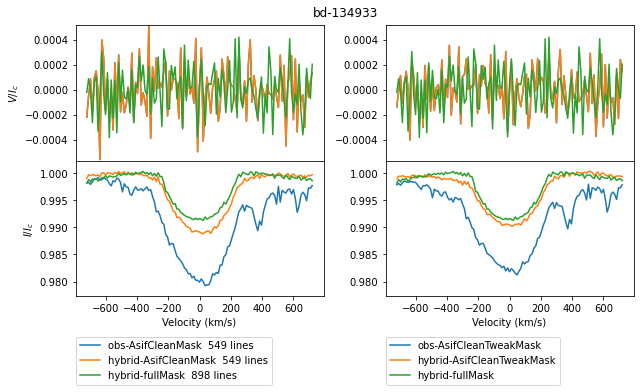

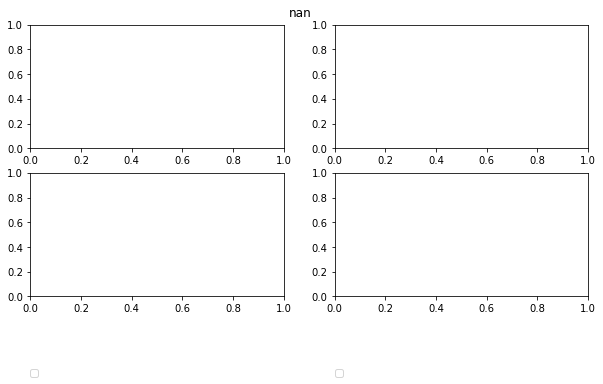

In [7]:
#Creates multi-page PDF for the plots of specV and specI of each star
models1=['normalized_CleanAsif+tellClean','hybrid_CleanAsif+tellClean','hybrid_maskdepth0.02_tellClean']
models2=['normalized_CleanAsifTweak+tellClean', 'hybrid_CleanAsifTweak+tellClean', 'hybrid_maskdepth0.02_tellClean']
labels1=['obs-AsifCleanMask','hybrid-AsifCleanMask','hybrid-fullMask']
labels2=['obs-AsifCleanTweakMask','hybrid-AsifCleanTweakMask','hybrid-fullMask']

with PdfPages('{}12-LSDComparison.pdf'.format(path)) as pdf:
    for i in range(len(StarData)): #Loops over all the stars in StarData
        star = StarData["Name"][i]
        obs=Observations.loc[Observations["Name"] == star]
        
        lsd_mins = []   #Keeps track of the minimum and maximums of the lsd profiles to set the y limits on graphs
        lsd_maxes = []
        specV_mins = []
        specV_maxes =[]
        mask_lines = [] #Keeps track of which lines (the actual values) that were used in the mask

        fig, ax = plt.subplots(2,2, figsize=(10, 5))
        for j in range(len(models1)): #Loop over the models
            for i in range(obs['Name'].size): #Loop over the observations
                file = '{}03-LSD-calculations/LSD/{}/{}_{}.lsd'.format(path, models1[j],star, i+1)
                lsd = pol.iolsd.read_lsd(file)
                lsd_size = int(lsd.vel.size)
                
                star_row = StarData.loc[StarData["Name"] == star]
                mc = star_row["ModelCode"]
                
                if models1[j] == "normalized_CleanAsif+tellClean": 
                    clean_file = '{}02-Mask-calculations/MaskCleaning/AsifMaskClean_tellClean/{}_clean_{}.mask'.format(path, star, i+1)
                    clean_mask = pol.iolsd.read_mask(clean_file)  #Reads mask file
                    clean_used = len(clean_mask.wl[clean_mask.iuse == 1]) #The total number of lines used in the observation
                    if StarData["Nobs"][i] >=  1:
                        mask_lines.append(clean_used)  #Adds the lines that the clean_mask used to the list mask_lines

                if models1[j] == "hybrid_maskdepth0.02_tellClean": #Note: This works for both hybrid models
                    dep02_file = '{}02-Mask-calculations/MaskCleaning/depth0.02_tellClean/{}_depth0.02.mask'.format(path, mc.item().upper()) 
                    dep_02_mask = pol.iolsd.read_mask(dep02_file)
                    dep_02_used = len(dep_02_mask.wl[dep_02_mask.iuse == 1]) 
                    #Note that we do not need to include a conditional statement since the number of lines per observation will be the same
                
                vrad=obs['Unnamed: 11'][obs.index[i]]
                if i == 0 :
                    if j == 0:
                        model_1, = ax[1,0].plot(lsd.vel+vrad, lsd.specI, ms=3,label=labels1[j],color='C{}'.format(j)) # Although this seems unnecessary, it is for the legend
                    if j == 1:
                        model_2, = ax[1,0].plot(lsd.vel+vrad, lsd.specI, ms=3,label=labels1[j],color='C{}'.format(j))
                    if j == 2:
                        model_3, = ax[1,0].plot(lsd.vel+vrad, lsd.specI, ms=3,label=labels1[j],color='C{}'.format(j))
                else:
                    ax[1,0].plot(lsd.vel+vrad, lsd.specI, ms=3,color='C{}'.format(j))
                lsd_mins.append(min(lsd.specI))
                lsd_maxes.append(max(lsd.specI))

                ax[0,0].plot(lsd.vel+vrad, lsd.specV, ms=3,color='C{}'.format(j))
                specV_mins.append(min(lsd.specV))
                specV_maxes.append(max(lsd.specV))

                plt.subplots_adjust(wspace = 0.25, hspace= .0) #wspace for the horizontal space between the subplots; hspace for the vertical space
                ax[1,0].set_xlabel('Velocity (km/s)')
                ax[1,0].set_ylabel('$I  /  I_c$')
                ax[0,0].set_ylabel('$V  /  I_c$')
                
                #Right Plots
                file2 = '{}03-LSD-calculations/LSD/{}/{}_{}.lsd'.format(path,models2[j],star,i+1)
                lsd2 = pol.iolsd.read_lsd(file2)
                lsd_size2 = int(lsd2.vel.size)

                if i==0:
                    ax[1,1].plot(lsd2.vel+vrad, lsd2.specI, ms=3,label=labels2[j],color='C{}'.format(j))
                    lsd_mins.append(min(lsd.specI))
                    lsd_maxes.append(max(lsd.specI))
                else:
                    ax[1,1].plot(lsd2.vel+vrad, lsd2.specI, ms=3,color='C{}'.format(j))
                    lsd_mins.append(min(lsd.specI))
                    lsd_maxes.append(max(lsd.specI))

                ax[0,1].plot(lsd2.vel+vrad, lsd2.specV, ms=3,color='C{}'.format(j))
                specV_mins.append(min(lsd2.specV))
                specV_maxes.append(max(lsd2.specV))

                plt.subplots_adjust(wspace = 0.25, hspace= .0) 
                ax[1,1].set_xlabel('Velocity (km/s)')


        fig.suptitle(star,y=0.93)
        if StarData["Nobs"][i] > 1: #Labeling the legend for the right subplots
            if min(mask_lines) == max(mask_lines):
                ax[1,0].legend(handles = [model_1, model_2, model_3], labels = [labels1[0]+"  "+ str(clean_used)+" lines", labels1[1]+"  " + str(clean_used)+" lines", labels1[2]+"  "+ str(dep_02_used) +" lines"], loc=(0,-0.65))
            else:
                ax[1,0].legend(handles = [model_1, model_2, model_3], labels = [labels1[0]+"  "+ str(clean_used) + "-" + str(clean_used)+" lines", labels1[1]+"  " + str(clean_used)+" lines", labels1[2]+"  "+ str(dep_02_used) +" lines"],loc=(0,-0.65))
        else:
            ax[1,0].legend(labels = [labels1[0]+"  "+ str(clean_used)+ " lines", labels1[1]+"  " + str(clean_used)+" lines", labels1[2]+"  "+ str(dep_02_used)+" lines"], loc=(0,-0.65))
        ax[1,1].legend(loc=(0,-0.65))

        ax[1,0].set_ylim([min(lsd_mins) - 0.002 , max(lsd_maxes) + 0.002]) #Makes the y-axis limits the same for the left and right plots
        ax[1,1].set_ylim([min(lsd_mins) - 0.002 , max(lsd_maxes) + 0.002])
        ax[0,0].set_ylim([min(specV_mins) - 7E-6 , max(specV_maxes) + 7E-6])
        ax[0,1].set_ylim([min(specV_mins) - 7E-6 , max(specV_maxes) + 7E-6])

        ax[0,0].set_xticks([]) #Removes x ticks from the top two subplots since the x-axis is the same for all of the subplots
        ax[0,1].set_xticks([])

        pdf.savefig(fig, bbox_inches='tight') #Includes legend in PDF